In [28]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X


array([[0, 1],
       [2, 3],
       [4, 5]])

In [29]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression


In [31]:
import pandas as pd
df = pd.read_csv('Datasets/housing.csv')

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [45]:
from sklearn.model_selection import train_test_split
X = df[['area', 'bedrooms', 'stories', 'parking']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [46]:
nan_count = df["bedrooms"].isna().sum()
print(nan_count)

0


In [47]:

"""MY VARIANTX = np.array(X)
X = X.reshape(-1, 1)
y = np.array(y)"""

X_train = X_train.values#.reshape(-1,1)
y_train = y_train.values
X_test = X_test.values#.reshape(-1,1)
y_test = y_test.values



print(X_train.shape, y_train.shape)


(436, 4) (436,)


In [48]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.coef_)
print(reg.intercept_)

0.4805187255145581
[3.35924710e+02 3.65918331e+05 6.19108989e+05 4.09730976e+05]
508169.00333268195


In [49]:
y_pred1 = reg.predict(X_test)


In [50]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test, y_pred1)
print(mse1)

2588528589510.748


ValueError: x and y must be the same size

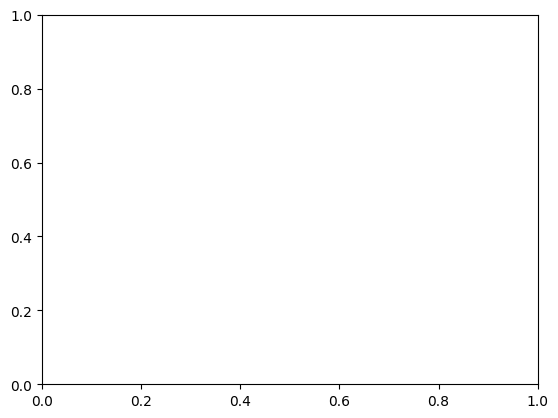

In [38]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='blue', label="Actual Data")  # Точки данных
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predictions")  # Линия предсказаний

plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Predictions")
plt.legend()
plt.grid(True)
plt.show()

In [51]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [52]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [53]:
y_pred2 = model.predict(X_test_poly)

ValueError: x and y must be the same size

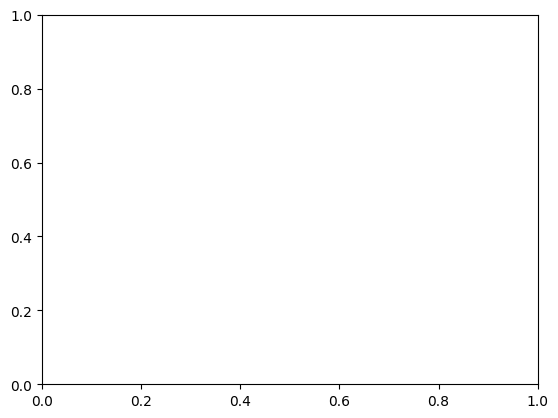

In [ ]:
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.plot(X_test, y_pred2, color='red', linewidth=2, label="Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression with Scikit-Learn")
plt.legend()
plt.grid(True)
plt.show()

In [54]:

mse2 = mean_squared_error(y_test, y_pred2)
print(mse2)
mse_res = mse1 - mse2
print(mse_res)

2593321091346.5283
-4792501835.780273


In [59]:
degrees = [0, 1, 2, 3, 4, 5]
colors = ['red', 'blue', 'green', 'purple']

for degr in (degrees):
    #poly = PolynomialFeatures(degree=degr)
    #X_train_poly = poly.fit_transform(X_train)
    #X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred_cycle = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    mse_cycle = mean_squared_error(y_test, y_pred_cycle)
    mse_train = mean_squared_error(y_train, y_pred_train)
    print(f'test_err is {mse_cycle}, train_err is {mse_train}')
 





test_err is 2588528589510.748, train_err is 1601764602111.5586
test_err is 2588528589510.748, train_err is 1601764602111.5586
test_err is 2588528589510.748, train_err is 1601764602111.5586
test_err is 2588528589510.748, train_err is 1601764602111.5586
test_err is 2588528589510.748, train_err is 1601764602111.5586
test_err is 2588528589510.748, train_err is 1601764602111.5586


Linear reg errors: 
test_err is 2588528589510.748, train_err is 1601764602111.5586
test_err is 2588528589510.748, train_err is 1601764602111.5586
test_err is 2588528589510.748, train_err is 1601764602111.5586
test_err is 2588528589510.748, train_err is 1601764602111.5586
test_err is 2588528589510.748, train_err is 1601764602111.5586
test_err is 2588528589510.748, train_err is 1601764602111.5586

Ridge reg errors:
test_err is 2589820644416.7783, train_err is 1601768767868.018
test_err is 2589820644416.7783, train_err is 1601768767868.018
test_err is 2589820644416.7783, train_err is 1601768767868.018
test_err is 2589820644416.7783, train_err is 1601768767868.018
test_err is 2589820644416.7783, train_err is 1601768767868.018
test_err is 2589820644416.7783, train_err is 1601768767868.018

In [65]:
from sklearn.linear_model import Ridge, Lasso
degrees = [0, 1, 2, 3, 4, 5]
colors = ['red', 'blue', 'green', 'purple']


for degr in (degrees):
    #poly = PolynomialFeatures(degree=degr)
    #X_train_poly = poly.fit_transform(X_train)
    #X_test_poly = poly.transform(X_test)

    model = Ridge(alpha=0.2)
    model.fit(X_train, y_train)

    y_pred_cycle = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    mse_cycle = mean_squared_error(y_test, y_pred_cycle)
    mse_train = mean_squared_error(y_train, y_pred_train)
    print(f'test_err is {mse_cycle}, train_err is {mse_train}')



test_err is 2588786916756.063, train_err is 1601764769481.5522
test_err is 2588786916756.063, train_err is 1601764769481.5522
test_err is 2588786916756.063, train_err is 1601764769481.5522
test_err is 2588786916756.063, train_err is 1601764769481.5522
test_err is 2588786916756.063, train_err is 1601764769481.5522
test_err is 2588786916756.063, train_err is 1601764769481.5522


In [ ]:
#  polynomial degrees
degrees = [0, 1, 2, 5]
colors = ['red', 'blue', 'green', 'purple']
 
# plt original data
plt.scatter(X_test, Y_test, color='black', label="Data")
 
# train+plot polynomial regression for each degree
for degree, color in zip(degrees, colors):
    model = PolynomialRegression(degree=degree)
    model.fit(X, Y)
    y_pred = model.predict(X_test)
    sorted_indices = np.argsort(X_test.flatten())
    X_sorted = X_test.flatten()[sorted_indices]
    y_pred_sorted = y_pred.flatten()[sorted_indices]
    plt.plot(X_sorted, y_pred_sorted, color=color, label=f"Degree {degree}")
 
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
 
plt.show()